In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from tensorflow.examples.tutorials import mnist
mnist = mnist.input_data.read_data_sets("MNIST_data/", one_hot = True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
input_width = 28
input_height = 28
input_channels = 1
input_pixels = 784

n_conv1 = 32
n_conv2 = 64
stride_conv1 = 1
stride_conv2 = 1
conv1_k = 5
conv2_k = 5
max_pool1_k = 2
max_pool2_k = 2

n_hidden = 1024
n_out = 10

input_size_to_hidden = (input_width//(max_pool1_k * max_pool2_k)) * (input_width//(max_pool1_k * max_pool2_k)) * n_conv2

In [4]:
weights = {
    "wc1" : tf.Variable(tf.random_normal([conv1_k, conv1_k, input_channels, n_conv1])),
    "wc2" : tf.Variable(tf.random_normal([conv2_k, conv2_k, n_conv1, n_conv2])),
    "wh1" : tf.Variable(tf.random_normal([input_size_to_hidden, n_hidden])),
    "wo" : tf.Variable(tf.random_normal([n_hidden, n_out]))
}

biases = {
    "bc1" : tf.Variable(tf.random_normal([n_conv1])),
    "bc2" : tf.Variable(tf.random_normal([n_conv2])),
    "bh1" : tf.Variable(tf.random_normal([n_hidden])),
    "bo" : tf.Variable(tf.random_normal([n_out]))
}

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
def conv(x, weights, biases, strides = 1):
    out = tf.nn.conv2d(x, weights, padding = "SAME", strides = [1,strides, strides, 1])
    out = tf.nn.bias_add(out, biases)
    out = tf.nn.relu(out)
    return out

def maxpooling(x, k = 2):
    return tf.nn.max_pool(x, padding="SAME", ksize = [1,k,k,1], strides = [1,k,k,1])

In [6]:
def cnn(x, weights, biases, keep_prob):
    x = tf.reshape(x,shape = [-1, input_height, input_width, input_channels])
    conv1 = conv(x, weights['wc1'], biases['bc1'], strides = stride_conv1)
    conv1_pool = maxpooling(conv1, max_pool1_k)
    
    conv2 = conv(conv1_pool, weights['wc2'], biases['bc2'], strides = stride_conv2)
    conv2_pool = maxpooling(conv2, max_pool2_k)
    
    hidden_input = tf.reshape(conv2_pool, shape = [-1, input_size_to_hidden])
    hidden_output_before_activation = tf.add(tf.matmul(hidden_input, weights['wh1']), biases['bh1'])
    hidden_output_before_dropout = tf.nn.relu(hidden_output_before_activation)
    hidden_output = tf.nn.dropout(hidden_output_before_dropout, keep_prob=keep_prob)
    
    output = tf.add(tf.matmul(hidden_output, weights['wo']), biases['bo'])
    return output

In [7]:
x = tf.placeholder("float", [None, input_pixels])
y = tf.placeholder(tf.int32, [None, n_out])
keep_prob = tf.placeholder("float")
pred = cnn(x, weights, biases, keep_prob)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [8]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = pred, labels = y))

In [9]:
optimizer = tf.train.AdamOptimizer(learning_rate = 0.01)
optimize = optimizer.minimize(cost)

In [10]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [11]:
batch_size = 100
total_cost_list = []
for i in range(25):
    num_batches = int(mnist.train.num_examples / batch_size)
    total_cost = 0
    for j in range(num_batches):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        c, _ = sess.run((cost, optimize), feed_dict={x:batch_x, y:batch_y, keep_prob: 0.8})
        total_cost += c
    print(total_cost)
    total_cost_list.append(total_cost)

835870.3303823471
40941.0762257576
22920.584242286335
14466.920329840854
12382.300423584878
10209.529609453297
8090.123764654223
8366.063487052917
6252.727561668754
5531.520495508788
6388.8583438564565
5344.224370183332
4620.31435929003
3811.212839966549
4444.039515147786
3385.3618134755607
3251.8149120730245
3058.823777445579
3656.7171360982884
3096.059095629903
2568.978143524148
2939.6988529282025
2703.639803090927
2458.437300424687
2818.407996866491


Text(0, 0.5, 'Cost')

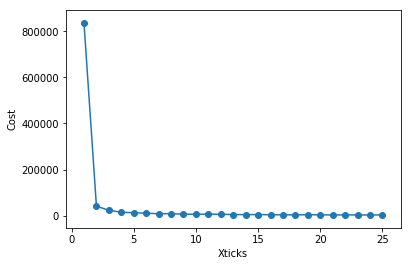

In [12]:
array = np.arange(1,26)
plt.plot(array, total_cost_list)
plt.scatter(array, total_cost_list)
plt.xlabel("Xticks")
plt.ylabel("Cost")

In [13]:
predictions = tf.arg_max(pred, 1)
correct_labels = tf.arg_max(y, 1)
correct_predictions = tf.equal(predictions, correct_labels)
predictions, correct_pred = sess.run([predictions, correct_predictions], feed_dict={x:mnist.test.images, y:mnist.test.labels, keep_prob:1.0})
correct_pred.sum()

Instructions for updating:
Use `tf.math.argmax` instead


9849